cifar10官网：
https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.contrib.slim as slim
# pip install keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

Using TensorFlow backend.


### 定义参数

In [2]:
# 设置最大迭代周期数
epochs = 100
# 设置每次训练的批次大小
batch_size = 128
# 分类数
num_classes = 10

In [3]:
# 定义模型的输入和标签的placeholder
image_holder = tf.placeholder(dtype=tf.float32,shape=[None,32,32,3])
label_holder = tf.placeholder(dtype=tf.int64,shape=[None])

### 载入数据，数据处理

In [4]:
# 载入数据
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
x_train.shape 

(50000, 32, 32, 3)

In [6]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [7]:
# 数据归一化
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


### 查看图片

(-0.5, 31.5, 31.5, -0.5)

Text(0.5,1,'frog')

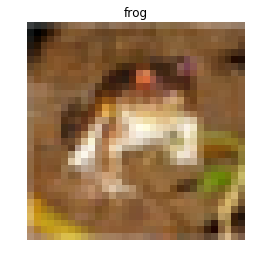

In [9]:
n = 0
target_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(x_train[n])
plt.axis('off')
plt.title(target_name[y_train[n]])
plt.show()

### 设置dataset对象和迭代器对象

In [10]:
# 创建dataset对象
dataset = tf.data.Dataset.from_tensor_slices((image_holder, label_holder))

In [11]:
# 训练周期
dataset = dataset.repeat(1)

In [12]:
# 批次大小
dataset = dataset.batch(batch_size)

In [13]:
# 初始化迭代器
iterator = dataset.make_initializable_iterator()
# 获得一个批次数据和标签
data_batch, label_batch = iterator.get_next()

### 定义模型

In [14]:
# 初始化权值
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

# 初始化偏置
def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

In [15]:
# 卷积层
def conv2d(x,W):
    #x input tensor of shape `[batch, in_height, in_width, in_channels]`
    #W filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels] ### 卷积核的权值矩阵
    #`strides[0] = strides[3] = 1`. strides[1]代表x方向的步长，strides[2]代表y方向的步长
    #padding: A `string` from: `"SAME", "VALID"`
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

# 池化层
def max_pool_2x2(x):
    #x input tensor of shape `[batch, in_height, in_width, in_channels]
    #ksize [1,x,y,1]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [16]:
def cifar10(inputs):
    
    ## 一层
    # 4*4 卷积 - 2*2 池化

    W_conv1 = weight_variable([4,4,3,32])
    b_conv1 = bias_variable([32]) 
 
    h_conv1 = tf.nn.relu(conv2d(inputs,W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    #(batch_size,16,16,32)
    
    ## 第二层
    W_conv2 = weight_variable([4,4,32,64])
    b_conv2 = bias_variable([64]) 
 
    h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    #(batch_size,8,8,64)
    
    ### 第三层
    W_conv3 = weight_variable([4,4,64,128])
    b_conv3 = bias_variable([128]) 
 
    h_conv3 = tf.nn.relu(conv2d(h_pool2,W_conv3) + b_conv3)
    h_pool3 = max_pool_2x2(h_conv3)
    #(batch_size,4,4,128)
    
    ## 扁平化

    h_pool3_flat = tf.reshape(h_pool3,[-1,4*4*128])
    
    #全连接层
    #第一层
    W_fc1 = weight_variable([4*4*128,256])
    b_fc1 = bias_variable([256])


    # 求第一个全连接层的输出
    h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat,W_fc1) + b_fc1)
    
    
    ##第二层
    W_fc2 = weight_variable([256,10])
    b_fc2 = bias_variable([10])


    # 求第二个全连接层的输出
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1,W_fc2) + b_fc2)
    
    ### softmax层
    net = tf.nn.softmax(h_fc2 )
    
#     with slim.arg_scope([slim.conv2d, slim.fully_connected],
#                          activation_fn=tf.nn.relu,
#                         weights_initializer=tf.glorot_uniform_initializer(),
#                          biases_initializer=tf.constant_initializer(0)):
#         net = slim.conv2d(inputs, 64, [3, 3])
#         net = slim.conv2d(net, 64, [3, 3])
#         net = slim.max_pool2d(net, [2, 2])
#         net = slim.conv2d(net, 128, [3, 3])
#         net = slim.conv2d(net, 128, [3, 3])
#         net = slim.max_pool2d(net, [2, 2])
#         net = slim.conv2d(net, 256, [3, 3])
#         net = slim.conv2d(net, 256, [3, 3])
#         net = slim.max_pool2d(net, [2, 2])

#         # 数据扁平化
#         net = slim.flatten(net)
#         net = slim.fully_connected(net, 256)
#         net = slim.fully_connected(net, num_classes, activation_fn=tf.nn.softmax)

    return net

### 模型训练

In [17]:
with tf.Session() as sess:
    # 传入数据得到结果
    prediction = cifar10(data_batch)
    # 定义loss
    # sparse_softmax_cross_entropy：标签为整数
    # softmax_cross_entropy：标签为one-hot独热编码
    loss = tf.losses.sparse_softmax_cross_entropy(labels=label_batch, logits=prediction)
    # 优化器
    optimizer = tf.train.AdamOptimizer(0.0001).minimize(loss)
    # 预测值里面概率最大的结果，跟真实标签数值相同就会得到True
    correct = tf.nn.in_top_k(prediction, label_batch, 1) 
    # 求准确率
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
  
    # 所有变量初始化  
    sess.run(tf.global_variables_initializer()) 
    # 定义saver保存模型
    saver = tf.train.Saver()
    # 训练epochs个周期
    for i in range(epochs):
        # 训练集传入迭代器中
        sess.run(iterator.initializer, feed_dict={image_holder: x_train,
                                                  label_holder: y_train})
        # 训练模型
        while True:
            try:
                sess.run(optimizer)
            except tf.errors.OutOfRangeError:
                # 所有数据训练完毕后跳出循环
                break
        # 测试集放入迭代器中
        sess.run(iterator.initializer, feed_dict={image_holder: x_test,
                                                  label_holder: y_test})
        # 测试结果
        while True:
            try:
                # 获得准确率和loss值
                acc,l = sess.run([accuracy,loss])
                # loss值统计
                tf.add_to_collection('sum_losses', l)
                # 准确率统计
                tf.add_to_collection('accuracy', acc)
            except tf.errors.OutOfRangeError:
                # loss值求平均
                avg_loss = sess.run(tf.reduce_mean(tf.get_collection('sum_losses')))
                # 准确率求平均
                avg_acc = sess.run(tf.reduce_mean(tf.get_collection('accuracy')))
                print('%d:test_loss=%.4f  test_accuracy=%.4f' % (i,avg_loss,avg_acc))
                # 清空loss统计
                temp = tf.get_collection_ref('sum_losses')
                del temp[:]
                # 清空准确率统计
                temp = tf.get_collection_ref('accuracy')
                del temp[:]
                # 所有数据测试完毕后跳出循环
                break
        if avg_acc>0.6:
            break
        
    # 保存模型
    saver.save(sess, 'models/cifar10.ckpt', global_step = epochs)



0:test_loss=2.1320  test_accuracy=0.3295
1:test_loss=2.0840  test_accuracy=0.3800
2:test_loss=2.0687  test_accuracy=0.3951
3:test_loss=2.0577  test_accuracy=0.4059
4:test_loss=2.0477  test_accuracy=0.4135
5:test_loss=2.0429  test_accuracy=0.4176
6:test_loss=2.0330  test_accuracy=0.4276
7:test_loss=2.0261  test_accuracy=0.4328
8:test_loss=2.0081  test_accuracy=0.4518
9:test_loss=2.0031  test_accuracy=0.4619
10:test_loss=1.9996  test_accuracy=0.4626
11:test_loss=1.9951  test_accuracy=0.4658
12:test_loss=1.9898  test_accuracy=0.4732
13:test_loss=1.9855  test_accuracy=0.4781
14:test_loss=1.9787  test_accuracy=0.4834
15:test_loss=1.9749  test_accuracy=0.4891
16:test_loss=1.9732  test_accuracy=0.4874
17:test_loss=1.9722  test_accuracy=0.4880
18:test_loss=1.9707  test_accuracy=0.4909
19:test_loss=1.9671  test_accuracy=0.4941
20:test_loss=1.9650  test_accuracy=0.4954
21:test_loss=1.9644  test_accuracy=0.4954
22:test_loss=1.9636  test_accuracy=0.4959
23:test_loss=1.9647  test_accuracy=0.4967
24

'models/cifar10.ckpt-100'